In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#pip install imblearn  #installing imblearn library which is used for handling imbalance data

In [3]:
#reading csv file into df
df=pd.read_csv('C:\\Users\\MERINA ANGEL\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()  #shows first 5 rows od dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#dtypes of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA
1. import librabries
2. finding categorical values 
3. finding numerical values
4. checking missing data and visualizing and replacing it or droping
5. check outliers and their treatment
6. normal data cleaning 
7. scaling the data

In [7]:
#5 point summary 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#type of total charges
df['TotalCharges'].dtype

dtype('O')

In [9]:
#unique values
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

dealing with missing values

In [10]:

#replace space with na 
df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [11]:
#here we can see the total charges is not show as integers
df.corr()  

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

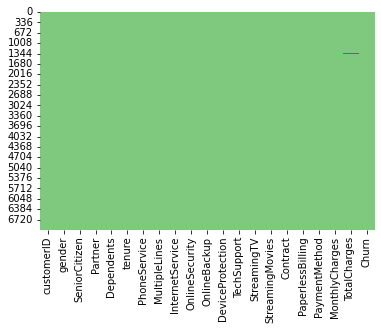

In [12]:
#visulaizing the missing values
sns.heatmap(df.isnull(),cbar=False,cmap='Accent')

In [13]:
#to numeric values
#df1=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df.isnull().sum()  #null() after replacing special character with null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
11/7043   #it is less than 30% so we can drop those rows

0.001561834445548772

In [16]:
#dropping null values in df
df1=df.dropna() 

In [17]:
#converting to numeric
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [18]:
#the null values has been dropped
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

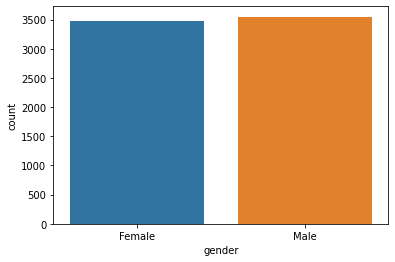

In [19]:
#using countplots to check value counts in gender feature
sns.countplot(df1.gender)

<AxesSubplot:xlabel='gender', ylabel='SeniorCitizen'>

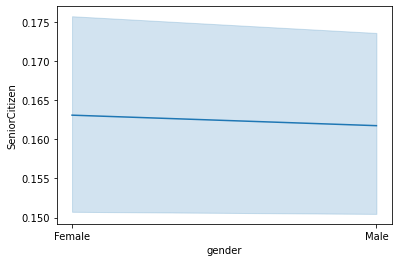

In [20]:
#checking relation between two features
sns.lineplot(data=df1, x="gender", y="SeniorCitizen") 

<AxesSubplot:xlabel='Dependents', ylabel='SeniorCitizen'>

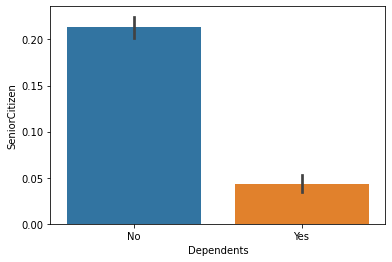

In [21]:
sns.barplot(df1['Dependents'],df1['SeniorCitizen'])   #barplot of the two features and relation between them

In [22]:
#shape attribute represents the rows and cols in dataset
df1.shape

(7032, 21)

In [23]:
df1.dtypes   #checking wether total charges as converted to numeric or not

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
df1['TotalCharges'].dtype  #type of feature

dtype('float64')

In [25]:
df1.describe()  #5 pt summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

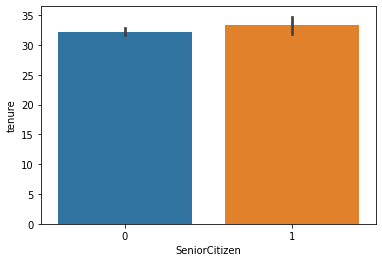

In [26]:
#checking the relations of 2 features
sns.barplot(df1['SeniorCitizen'],df1['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

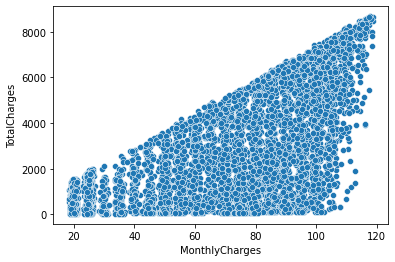

In [27]:
#chcking relation between of 2 features
sns.scatterplot(df1['MonthlyCharges'],df1['TotalCharges'])

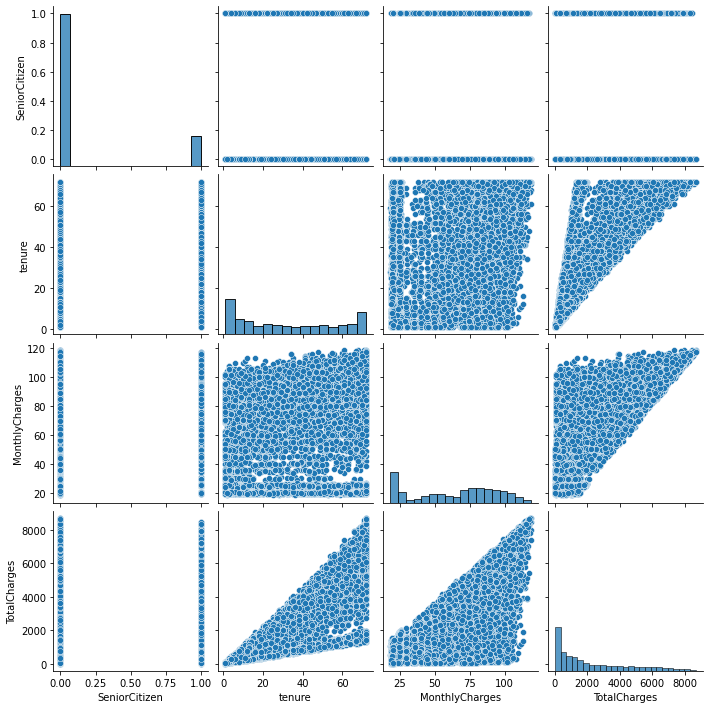

In [28]:
sns.pairplot(df1)

imbalance data handling

In [29]:
df['Churn'].value_counts()   #unique values and their counts of particular feature(churn)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [30]:
from imblearn.combine import SMOTEENN  #smoteen function is used to handle imbalance data.It is a mix of over and under sampling

In [31]:
#handling imbalance data
sm=SMOTEENN()

checking outliers

<AxesSubplot:xlabel='SeniorCitizen'>

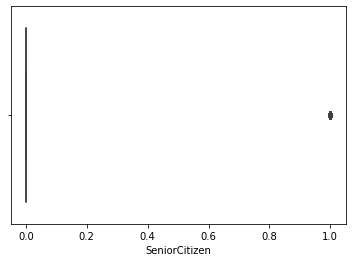

In [32]:
#boxplot to check outliers
sns.boxplot(df1['SeniorCitizen'])

In [33]:
df1['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='tenure'>

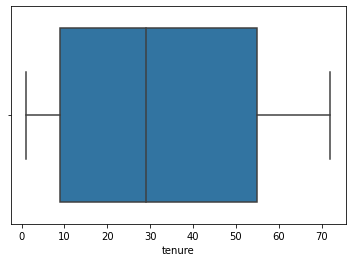

In [34]:
sns.boxplot(df1['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

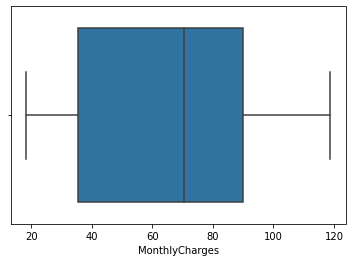

In [35]:
sns.boxplot(df1['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

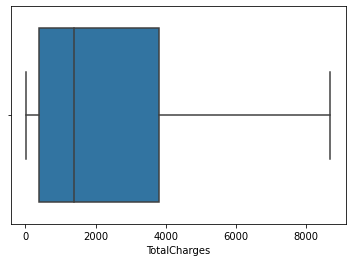

In [36]:
sns.boxplot(df1['TotalCharges'])

In [37]:
#as there is no outliers no need of outlier treatment by deleting or replacing it

In [38]:
df1.shape #r,c of df

(7032, 21)

In [39]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

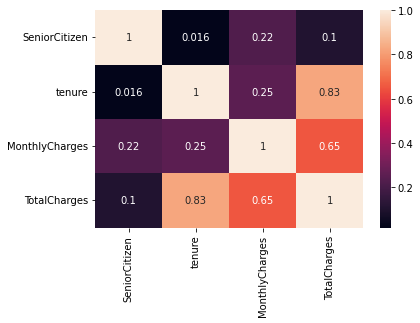

In [40]:
sns.heatmap(df1.corr(),annot=True)

In [41]:
#droping unwanted col
df1.drop('customerID',inplace=True,axis=1) 

finding numeric values

In [42]:
# getting numeric columns
x=df1._get_numeric_data().columns

In [43]:
x

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

finding categorical values

In [44]:
categorical=df1.value_counts() #categorical col

In [45]:
df2=df1.columns[df1.dtypes=='object']

In [46]:
pd.Categorical(df2)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', ..., 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Length: 16
Categories (16, object): ['Churn', 'Contract', 'Dependents', 'DeviceProtection', ..., 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender']

In [47]:
#we will get to know unique cols and special characters
def uniquecol(df1):
    for column in df1:
        if df1[column].dtypes =='object':
            print(f'{column} : {df1[column].unique()}')

In [48]:
uniquecol(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [49]:
#replacement with no

In [50]:
df1['MultipleLines'].replace('No phone service','No',inplace=True)

In [51]:
df1['OnlineSecurity'].replace('No internet service','No',inplace=True)

In [52]:
df1['OnlineBackup'].replace('No internet service','No',inplace=True)

In [53]:
df1['DeviceProtection'].replace('No internet service','No',inplace=True)

In [54]:
df1['TechSupport'].replace('No internet service','No',inplace=True)

In [55]:
df1['StreamingTV'].replace('No internet service','No',inplace=True)

In [56]:
df1['StreamingMovies'].replace('No internet service','No',inplace=True)

In [57]:
#checking whether replacement is done or not
uniquecol (df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [58]:
#replacing with 1,0
colreplace=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','Churn']
for cols in colreplace:
    df1.replace({'Yes':1,'No':0}, inplace=True)

In [59]:
 #replacing with 1,0
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

# one hot encoding

In [60]:
#one hot encoding to nominal values to get converted into 0 and 1s
from sklearn.preprocessing import OneHotEncoder

In [61]:
#assigning the onehot encoding of columns with s
s=pd.get_dummies(data=df1,columns=['Contract','PaymentMethod','InternetService'])

In [62]:
s

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [63]:
x=s.drop('Churn',axis=1)
y=s.Churn #separation of dependent and independent features

In [64]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [65]:
s.info()  #shows the non null info of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [66]:
#using standardscaler to standardize
from sklearn.preprocessing import StandardScaler

In [67]:
i= StandardScaler()

In [68]:
#fitting and transformation of training dataset
i.fit_transform(x_train,y_train)

array([[-0.99554022, -0.44153169, -0.96485922, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [-0.99554022, -0.44153169,  1.03642063, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [ 1.00447976, -0.44153169,  1.03642063, ..., -0.53176405,
         1.4011692 , -0.89018276],
       ...,
       [ 1.00447976, -0.44153169, -0.96485922, ..., -0.53176405,
         1.4011692 , -0.89018276],
       [-0.99554022, -0.44153169,  1.03642063, ...,  1.88053331,
        -0.71368968, -0.89018276],
       [ 1.00447976, -0.44153169, -0.96485922, ..., -0.53176405,
         1.4011692 , -0.89018276]])

In [69]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
2194,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4117,0,0,1,0,63,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2403,1,0,1,0,71,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1616,0,0,1,1,53,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5017,1,0,1,0,41,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,1,0,0,0,10,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
6318,0,0,0,1,12,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
6160,1,0,0,0,36,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
6372,0,0,1,1,4,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [70]:
i.transform(x_test) #transforming the testing dataset

array([[-0.99554022, -0.44153169, -0.96485922, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [ 1.00447976, -0.44153169, -0.96485922, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [-0.99554022, -0.44153169, -0.96485922, ..., -0.53176405,
        -0.71368968,  1.12336482],
       ...,
       [-0.99554022, -0.44153169,  1.03642063, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [-0.99554022,  2.26484311,  1.03642063, ..., -0.53176405,
        -0.71368968,  1.12336482],
       [ 1.00447976, -0.44153169, -0.96485922, ..., -0.53176405,
         1.4011692 , -0.89018276]])

# building model and checking accuracy

In [71]:
from sklearn.linear_model import LogisticRegression

# logistic regression
here i am comparing the accuracy with and without using the SMOTEENN()

In [72]:
#logistic regression
classifier=LogisticRegression()

In [73]:
#fitting the trainind set into logistic regression
classifier.fit(x_train,y_train)

LogisticRegression()

In [74]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
2194,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4117,0,0,1,0,63,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2403,1,0,1,0,71,1,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1616,0,0,1,1,53,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5017,1,0,1,0,41,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,1,0,0,0,10,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
6318,0,0,0,1,12,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
6160,1,0,0,0,36,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0
6372,0,0,1,1,4,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [75]:
y_pred= classifier.predict(x_test)

In [76]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [78]:
#confusion matrix help to know type 1 and type 2 error
cm=confusion_matrix(y_test,y_pred)
cm

array([[1364,  193],
       [ 237,  316]], dtype=int64)

In [79]:
#accuracy of df1 without using smoteenn()
accuracy_score(y_test,y_pred)

0.7962085308056872

In [80]:
y_train_pred=classifier.predict(x_train)

In [81]:
accuracy_score(y_train,y_train_pred)

0.8078017066233238

with using SMOTEENN()

In [82]:
xresample_train,yresample_train=sm.fit_resample(x,y) #fitting x,y in smoteenn()

<AxesSubplot:xlabel='SeniorCitizen'>

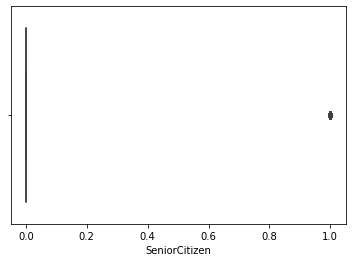

In [83]:
sns.boxplot(xresample_train['SeniorCitizen'])

In [84]:
(xresample_train['SeniorCitizen']).value_counts()

0    5161
1     657
Name: SeniorCitizen, dtype: int64

In [85]:
#train_test_split
xsm_train,xsm_test,ysm_train,ysm_test=train_test_split(xresample_train,yresample_train,test_size=0.3) 

In [86]:
#fitting training set
classifier.fit(xresample_train,yresample_train)

LogisticRegression()

In [87]:
ysm_pred=classifier.predict(xsm_test)  #prediction of testing data

In [88]:
ysm_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [89]:
accuracy_score(ysm_test,ysm_pred)  #accuracy after imbalance data handling

0.9398625429553265

In [90]:
confusion_matrix(ysm_test,ysm_pred) #confusion matrix

array([[756,  52],
       [ 53, 885]], dtype=int64)

accuracy changed from 79% to 94%  as imbalance data got balanced

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#hyper parameter tunning
parameters={ 'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    
}

In [93]:
regcv=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [94]:
regcv.fit(xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [95]:
regcv.best_score_

0.9489205770187364

In [96]:
regcv.best_params_

{'penalty': 'none', 'solver': 'newton-cg'}

# knn

In [97]:

from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier()

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
y_pred= knn.predict(x_test)

In [101]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [102]:
#confusion matrix 
confusion_matrix(y_test,y_pred)

array([[1352,  205],
       [ 310,  243]], dtype=int64)

In [103]:
#accuracy score without handling the imbalance data
accuracy_score(y_test,y_pred)

0.7559241706161137

accuracy is 75%

In [104]:
err_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)#kvalue
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    err_rate.append(np.mean(y_pred != y_test))#it helps to set the k value

Text(0, 0.5, 'ER')

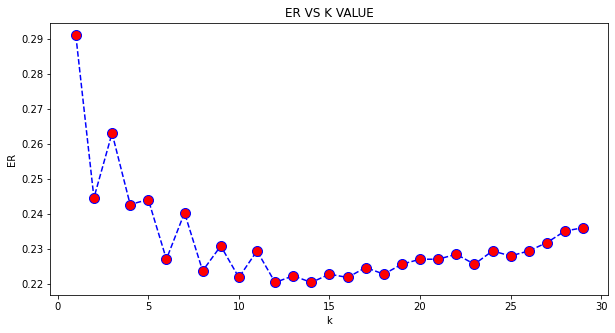

In [105]:
#plotting the graph of er vs k
plt.figure(figsize=(10,5))
plt.plot(range(1,30),err_rate,color='Blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('ER VS K VALUE')  #where er is less we select it as k value
plt.xlabel('k')
plt.ylabel('ER')   

with using SMOTEENN()

In [106]:
knn.fit(xsm_train,ysm_train)

KNeighborsClassifier(n_neighbors=29)

In [107]:
ysm_pred=knn.predict(xsm_test)

In [108]:
ysm_test

705     0
688     0
1597    0
4710    1
486     0
       ..
4262    1
1872    0
1817    0
3601    1
3295    1
Name: Churn, Length: 1746, dtype: int64

In [109]:
confusion_matrix(ysm_test,ysm_pred)

array([[729,  79],
       [111, 827]], dtype=int64)

In [110]:
err_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)#kvalue
    knn.fit(xsm_train,ysm_train)
    y_pred=knn.predict(xsm_test)
    err_rate.append(np.mean(y_pred != ysm_test))#it helps to set the k value

Text(0, 0.5, 'ER')

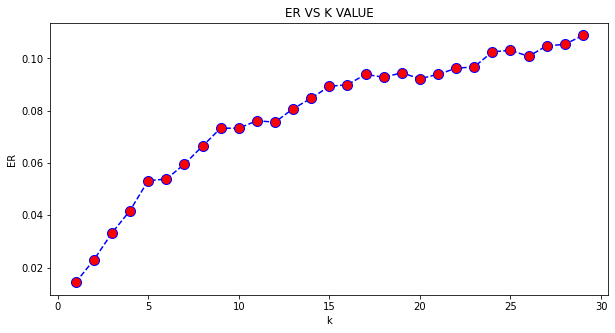

In [111]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),err_rate,color='Blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('ER VS K VALUE')  #where er is less we select it as k value
plt.xlabel('k')
plt.ylabel('ER')   

In [112]:
#k value=1
knn= KNeighborsClassifier(n_neighbors=1)

knn.fit(xsm_train,ysm_train)
ysm_pred=knn.predict(xsm_test)

print('with k-1')
print('\n')
print(confusion_matrix(ysm_test,ysm_pred))
print('\n')
print(classification_report(ysm_test,ysm_pred))

with k-1


[[791  17]
 [  8 930]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       808
           1       0.98      0.99      0.99       938

    accuracy                           0.99      1746
   macro avg       0.99      0.99      0.99      1746
weighted avg       0.99      0.99      0.99      1746



accuracy got changed from 75% to 98%

In [113]:
parameters={'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [114]:
knncv=GridSearchCV(knn,param_grid=parameters,cv=5)

In [115]:
knncv.fit(xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [116]:
knncv.best_score_

0.9793702235420026

In [117]:
knncv.best_params_

{'algorithm': 'auto', 'weights': 'uniform'}

# DECISION TREE CLASSIFIER

In [118]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
a=DecisionTreeClassifier()

In [119]:
a.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
y_pred=a.predict(x_test)

In [121]:
a.fit(xsm_train,ysm_train)

DecisionTreeClassifier()

In [122]:
ysm_pred=a.predict(xsm_test)

In [123]:
ysm_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [124]:
#without smoteenn()
accuracy_score(y_test,y_pred)

0.7388625592417062

In [125]:
#with smoteenn()
accuracy_score(ysm_test,ysm_pred)

0.9381443298969072

by using SMOTEENN() the accuracy has changed from 73% to 94%

In [126]:
parameter={'criterion' : ["gini", "entropy", "log_loss"],'splitter' : ["best", "random"]}

In [127]:
regcv=GridSearchCV(a,param_grid=parameter)

In [128]:
regcv.fit(xsm_train,ysm_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [129]:
regcv.best_score_

0.932956994920185

In [130]:
regcv.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

# NAIVE BAYES CLASSIFIER

In [131]:
#naivebayes classifier
from sklearn.naive_bayes import GaussianNB

In [132]:
naive=GaussianNB()

In [133]:
naive.fit(x_train,y_train) #fitting training dataset

GaussianNB()

In [134]:
y_pred=naive.predict(x_test)

In [135]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
#accuracy without handling imbalance data 
accuracy_score(y_test,y_pred)

0.7331753554502369

In [137]:
#confusion matrix shows type 1 and type 2 error
confusion_matrix(y_test,y_pred)

array([[1109,  448],
       [ 115,  438]], dtype=int64)

using SMOTEENN()

In [138]:
naive.fit(xsm_train,ysm_train)

GaussianNB()

In [139]:
ysm_pred=naive.predict(xsm_test)

In [140]:
accuracy_score(ysm_test,ysm_pred) #using accuracy score using smoteenn on naive bayes classifier model

0.9095074455899198

accuracy changed from 73% to 90%

In [141]:
cm=confusion_matrix(ysm_test,ysm_pred)

In [142]:
#using smoteenn() the type1&2 errors
cm 

array([[741,  67],
       [ 91, 847]], dtype=int64)

# RANDOM FOREST CLASSIFIER

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf=RandomForestClassifier()

In [145]:
rf.fit(x_train,y_train) #fitting training dataset

RandomForestClassifier()

In [146]:
y_pred=rf.predict(x_test) #prediction of x_test

In [147]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
confusion_matrix(y_test,y_pred)

array([[1360,  197],
       [ 283,  270]], dtype=int64)

In [149]:
#acuracy without using smoteenn()
accuracy_score(y_test,y_pred)

0.7725118483412322

using SMOTEENN()

In [150]:
rf.fit(xsm_train,ysm_train) #fitting training dataset after smoteenn()

RandomForestClassifier()

In [151]:
ysm_pred=rf.predict(xsm_test)

In [152]:
accuracy_score(ysm_test,ysm_pred)  #using accuracy score using smoteenn on rf model

0.9536082474226805

accuracy changed from 77% to 96%

In [153]:
parameters={'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'criterion' : ["gini", "entropy", "log_loss"]
}

In [154]:
regcv=GridSearchCV(rf,param_grid=parameters,cv=5)

In [155]:
regcv.fit(xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]})

In [156]:
regcv.best_params_

{'criterion': 'gini', 'n_estimators': 17}

In [157]:
regcv.best_score_

0.9494098672012783

# SVC

In [158]:
from sklearn.svm import SVC

In [159]:
svc=SVC()

In [160]:
svc.svm = SVC(kernel='linear') 
svc.svm.fit(xsm_train,ysm_train)
preds = svc.svm.predict(xsm_test)
accuracy_score(ysm_test, preds)

0.9410080183276059

# roc_auc_score

In [161]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [162]:
pred=[]
for model in [classifier,knn,naive,rf]:
    pred.append(pd.Series(model.predict_proba(xsm_test)[:,1])) #append the probability score for each model of target
final_pred = pd.concat(pred,axis=1).mean(axis=1) #concatention of score of eah model
print('ensemble test roc-auc:{}'.format(roc_auc_score(ysm_test,final_pred)))

ensemble test roc-auc:0.9946576347400198


In [163]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.000053,0.0,9.489445e-46,0.00
1,0.000505,0.0,1.192191e-19,0.01
2,0.007460,0.0,2.032681e-14,0.04
3,0.968878,1.0,9.999837e-01,0.98
4,0.246498,0.0,4.210167e-15,0.30
...,...,...,...,...
1741,0.994183,1.0,1.000000e+00,1.00
1742,0.000856,0.0,1.307875e-06,0.01
1743,0.001273,0.0,4.758961e-15,0.01
1744,0.555005,1.0,8.198031e-02,0.97


# adaboost classifier

In [164]:
from sklearn.ensemble import AdaBoostClassifier
#As we are creating multiple records of errors it works best here

In [165]:
ada=AdaBoostClassifier()

In [166]:
ada.fit(xsm_train,ysm_train)

AdaBoostClassifier()

In [167]:
y_pred= ada.predict(xsm_test)

In [168]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [169]:
accuracy_score(ysm_test,y_pred)

0.9478808705612829

In [170]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [171]:
y_pred=ada.predict(x_test)

In [172]:
accuracy_score(y_test,y_pred)

0.7971563981042654

In [175]:
parameter={'algorithm' : ['SAMME', 'SAMME.R']}

In [179]:

adacv=GridSearchCV(ada,param_grid=parameter,cv=5)

In [181]:
adacv.fit(xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R']})

In [182]:
adacv.best_params_

{'algorithm': 'SAMME.R'}